# 2 Subfind Catalogues

### 2.1  
Using the function Subfind of InspectorGadget, compute the halo mass function and
the stellar mass function and establish the maximum and minimum halo masses that
are resolved in the simulation.

In [1]:
#librerías
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.pyplot as plt
import gadget 
import arepo

%pylab inline


Populating the interactive namespace from numpy and matplotlib


/home/daniel/.local/lib/python3.6/site-packages/gadget-0.1-py3.6-linux-x86_64.egg/gadget/const.py:20: UserWarning: Could not setup constants
  warnings.warn("Could not setup constants")


In [2]:
#And the "*Type" fields (with 6 entries) are the same numbering as the snapshots (0=gas, 1=dm, 4=stars+wind, 5=bhs).

sub=gadget.Subfind("Data/groups_015/fof_subhalo_tab_015.0.hdf5")

In [3]:
#print(sub)

#sub.subhalo.SubhaloCM
#print(sub.subhalo)
#print(sub.subhalo.SubhaloMassType)
Mass_halo=sub.subhalo.SubhaloMass*1e10/0.7 #masa de los subhalos [10e10 M_{sol}/h]
len(Mass_halo)
contador=[]
Masa_halo_corregido=[] #Hay datos que dañan la muestra(muy grande), estos datos no se tendran en cuenta en este arreglo
#print(Mass_halo)
for i in range(1,len(Mass_halo)):
        
        contador.append(i)
        Masa_halo_corregido.append(Mass_halo[i])
        #Mass_sin_primer_dato.appen    
       
    
contador=np.array(contador)
print(len(Masa_halo_corregido))

def funcion(x,A,a,b):
    """ modelo para nuestro dato """
    
    #return stats.poisson.cdf(x,mu)
    return A*x**a+b

#popt, pcov = curve_fit(funcion, contador, Masa_halo_corregido)

#print(popt)  #popt son los valores de A y B por el ajuste  
#print(np.sqrt(np.diag(pcov))) ## errores de A y B respectivamente



318


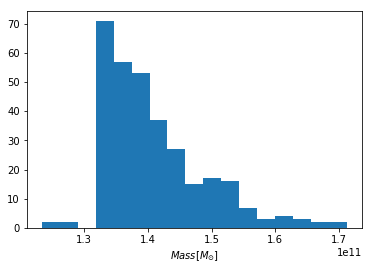

In [4]:

#plt.plot(contador, np.log(Masa_halo_corregido))
#plt.plot(contador,funcion(contador,popt[0],popt[1]))
#plt.ylim(-2,10)
#plt.xlabel("galaxia")
#plt.ylabel("log10(Mass_halo)")
#plt.show()
#bins=np.sqrt(len(Masa_halo_corregido))

histo_Masa_halo=np.histogram(np.log10(Masa_halo_corregido), bins=17)

#np.asarray(histo_Masa_halo)

#print(histo_Masa_halo)
histo_Masa_halox=np.delete(histo_Masa_halo[1],-1)
#print(len(histo_Masa_halo[0]),len(histo_Masa_halo[1]))

#popt, pcov = curve_fit(funcion, histo_Masa_halox,histo_Masa_halo[0])

#x=np.arange(-1.5,2,0.1)
plt.hist(np.log10(Masa_halo_corregido)*1e10/0.7, bins=17)
#plt.plot(x,funcion(popt[0],popt[1],popt[2]))
#plt.plot(histo_Masa_halox,funcion(histo_Masa_halox,*popt))
plt.xlabel('$Mass[M_{\odot}]$')
plt.show()


## 2.2)

Para este punto se va a considerar la masa de diferentes halos. Para cada halo se va ha tomar la cantidad de materia en materia oscura y en materia barionica. Como es sabido la matería oscura se encuntra mayormente en el halo. Se va hacer la gráfica de

$\frac{Mass_{\star}}{Mass_{DM}}(Mass_{DM})$ donde $Mass_{halo}\propto Mass_{DM}$

(array([  3.08735925e-03,   1.73320918e-01,   1.69547479e-01,
          9.87954960e-02,   8.65318190e-02,   1.04970214e-01,
          4.86687882e-01,   6.61380959e-01,   3.10022325e-01,
          1.42275805e-01,   5.77164660e-02,   2.37555142e-02,
          9.86239760e-03,   3.43039917e-03,   1.54367962e-03,
          7.71839812e-04,   2.57279937e-04]),
 array([  6.5126915 ,   6.94114825,   7.36960501,   7.79806176,
          8.22651852,   8.65497527,   9.08343203,   9.51188878,
          9.94034554,  10.3688023 ,  10.79725905,  11.22571581,
         11.65417256,  12.08262932,  12.51108607,  12.93954283,
         13.36799958,  13.79645634]),
 <a list of 17 Patch objects>)

/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


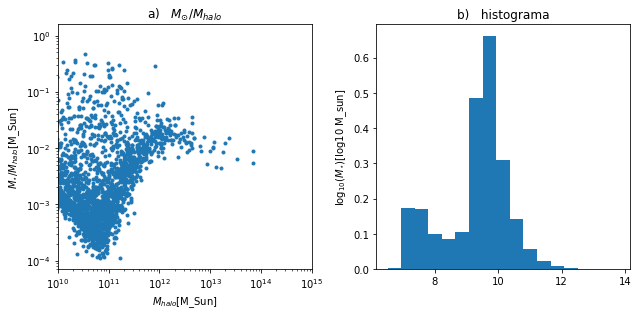

In [5]:
#sn = gadget.Subfind('Data/groups_015/', parttype=[4,5],  fields =['mass'], combineFiles=True)
#sub = arepo.Subfind('Data/groups_015/', SnapNumber=10 ,combineFiles=True)
DataFolder = './Data/groups_015/'
SnapNumber = 15



sub = arepo.Subfind('%s/'%(DataFolder), SnapNumber ,combineFiles=True)

Mass_halo=sub.SubhaloMass*1e10/0.7  ##Masa del los halos
Mass_haloDM=sub.SubhaloMassType[:,1]*1e10/0.7 ##Mass only dark matter
#Mass_haloDM=sub.SubhaloMassType[sub.SubhaloMassType[:,1]!=0,1] ##Mass only dark matter
Mass_star=sub.SubhaloMassType[:,4] *1e10/0.7##Masa estelar
Mass_star_histo=sub.SubhaloMassType[sub.SubhaloMassType!=0] *1e10/0.7##Masa estelar se obvian los datos que contengan ceros

"""
plt.loglog(Mass_halo,(Mass_star/Mass_halo),'.')
#plt.plot(Mass_star,Mass_halo,'.')
plt.xlim(10e9,10e14)
#plt.hist(np.log10(Mass_star_histo), normed='True', bins=17)
"""

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
ax1.set_xlim(10e9,10e14)
ax1.set_title('a)   $M_{\odot}/M_{halo}$')
ax1.set_ylabel('$M_{\star}/M_{halo}$[M_Sun]')
ax1.set_xlabel('$M_{halo}$[M_Sun]')
ax1.loglog(Mass_halo,(Mass_star/Mass_halo),'.')

ax2.set_title('b)   histograma')
ax2.set_xlabel('')
ax2.set_ylabel('$\log_{10}(M_{\star})$[log10 M_sun]')
ax2.hist(np.log10(Mass_star_histo), normed='True', bins=17)



Interpretación: El pico que se observa para estrellas con masa aproximada a $10^{12}M_{\odot}$, es devido a la disminución de la formación estelar producida por la  aparición de un agn. El agn ioniza el gas a su al rededor y no permite la formación estelar, por otro lado la taza de materia oscura no se ve aectada por ello. Por esto la razón $M_{\star}/M_{halo}$ esmpieza a disminuir.  


## 2.3)

In [6]:


#filter=[gadget.filter.Halo(sub.SubhaloPos[:,2]),gadget.filter.Stars()] ##used the Black holes as stars

#filter=[gadget.filter.Halo(sub,halo=4),gadget.filter.Stars()] ##used the Black holes as stars


sn_bh = gadget.Snapshot('./Data/snapdir_015/snap_015.0.hdf5', parttype=[5], combineFiles=True, verbose=True)

#sn_bh = gadget.Snapshot('./Data/snapdir_015/snap_015.1.hdf5', parttype=[5],  combineFiles=True, verbose=True)
#sn_bh = gadget.Snapshot('./Data/snapdir_015/', parttype=[5] ,combineFiles=True,fields=['mass','Position'])
#Mask = sn_bh.

#print(sn_bh)
#plt.plot(sn_bh[Mask],sub.SubhaloBHMass[Mask])
#sn = gadget.Simulation('./Data/snapdir_015/snap_015.0.hdf5')
#sn.plot_Aslice('z')

#snap_015.0.hdf5
"""
DataFolder='./Data/snapdir_015'
SnapNumber=1

Sub = gadget.Snapshot('%s/'%(DataFolder), SnapNumber ,combineFiles=True)
##  Como saber cuantos snapshops tiene usando algun comando?
"""

Learning about file 0
Learning about file 1
Learning about file 2
Learning about file 3
Learning about file 4
Learning about file 5
Learning about file 6
Learning about file 7
Learning about file 8
Learning about file 9
Learning about file 10
Learning about file 11
Learning about file 12
Learning about file 13
Learning about file 14
Learning about file 15
Learning about file 16
Learning about file 17
Learning about file 18
Learning about file 19
Learning about file 20
Learning about file 21
Learning about file 22
Learning about file 23
Learning about file 24
Learning about file 25
Learning about file 26
Learning about file 27
Learning about file 28
Learning about file 29
Learning about file 30
Learning about file 31
Learning about file 32
Learning about file 33
Learning about file 34
Learning about file 35
Learning about file 36
Learning about file 37
Learning about file 38
Learning about file 39
Learning about file 40
Learning about file 41
Learning about file 42
Learning about file 4

"\nDataFolder='./Data/snapdir_015'\nSnapNumber=1\n\nSub = gadget.Snapshot('%s/'%(DataFolder), SnapNumber ,combineFiles=True)\n##  Como saber cuantos snapshops tiene usando algun comando?\n"

[ True  True  True ..., False False False]


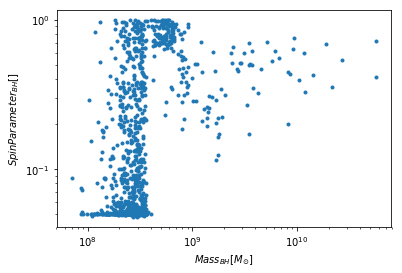

In [7]:
"""
Tengo dudas con respecto a los datos que se deben tomar, no se si por ejemplo estos(los de este punto) corresponden
a lo que se quiere graficar
"""

Mass_BHstar=sn_bh.BH_Mass[sn_bh.pos[:,2]!=0]*10e10/0.7 ##[M_sun]
Mass_BH=sn_bh.Masses[sn_bh.pos[:,2]!=0]*10e10/0.7 #[M_sun] masa total particula del BH
#print(sn_bh.BH_SpinParameter[sn_bh.pos[:,2]])
print(sn_bh.pos[:,0]<2000)
#Spin_parameter=sn_bh.BH_SpinParameter
Spin_parameter=sn_bh.BH_SpinParameter[sn_bh.pos[:,2]!=0]

#Mass=sn_bh.BH_Mass

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)

plt.loglog(Mass_BH,Spin_parameter ,'.')
plt.xlabel('$Mass_{BH}[M_{\odot}]$')
plt.ylabel('$SpinParameter_{BH}[]$')




## 2.3)



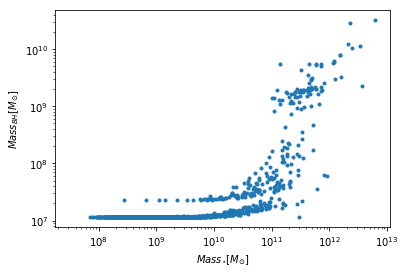

In [12]:
#print(sub)


#DataFolder = './Data/groups_015/'
#SnapNumber = 15



#sub = arepo.Subfind('%s/'%(DataFolder), SnapNumber ,combineFiles=True)

Sub=arepo.Subfind('./Data/groups_015/',15,combineFiles=True)
#Masa de los black holes

Mass_stellar=Sub.SubhaloMassType[:,4]*10e10/0.7 ## Type4 ->Stars
Mass_BH=Sub.SubhaloBHMass*10e10/0.7  ## Masa BH 
#Mass_BH=Sub.SubhaloMassType[:,5]*10e10/0.7 ## Type5 ->BH

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)

plt.loglog(Mass_stellar,Mass_BH,'.')
plt.xlabel('$Mass_{\star}[M_{\odot}]$')
plt.ylabel('$Mass_{BH}[M_{\odot}]$')

#ax2.loglog(Mass_BH,Mass_BH/Mass_stellar,'.')
#ax2.set_ylabel('$MassBH/MassBH_{\star}[M_{\odot}]$')
#ax2.set_xlabel('Mass$_{BH}[M_{\odot}]$')
